In [8]:
from scripts import Diatom

In [9]:
diatom = Diatom("iLB1027_lipid.xml", "DM")

'R_AAL(fum)_c' is not a valid SBML 'SId'.
'R_sink_Asn-X-Ser_Thr_c' is not a valid SBML 'SId'.


In [10]:
def polytope_pipeline(reactions: tuple[str, str], n_angles: int = 360, delta: float = 0.01, n_clusters: int = 20):
    diatom.set_objective_functions({reactions[1]: 1.0})
    diatom.analyze.project_polytope_2d(reactions, n_angles = n_angles)
    diatom.grid.sample_polytope(delta = delta)
    diatom.grid.debug_plot(delta = delta)
    diatom.analyze.qualitative_analysis(only_load=False)
    diatom.clustering.set_grid_clusters('hierarchical', k = n_clusters)
    #df = diatom.clustering.get_grid_cluster_qual_profiles(threshold=0.8, changing= True)
    #diatom.clustering.compare_clusters(df, reactions[0], reactions[1]).head(200)
    diatom.plot.sampled_polytope(show_boundary=True)


def analyze_reactions(reaction_list1: list[str], reaction_list2: list[str], n_angles: int = 360, delta: float = 0.0125) -> None:
    for reaction1 in reaction_list1:
        for reaction2 in reaction_list2:
            polytope_pipeline((reaction1, reaction2), n_angles = n_angles, delta = delta)


Maximize
1.0*RUBISC_h - 1.0*RUBISC_h_reverse_da140


/home/chuckolate/miniconda3/envs/benpy310_linux/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


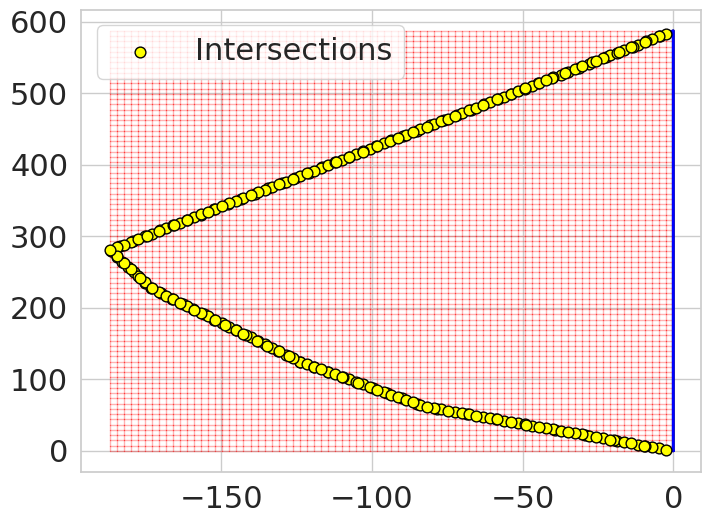

Running qualitative fva over grid feasible points...
No reactions previously selected for FVA and clustering!
Setting reactions for analysis...

Analyzing point feasibility....


 29%|██▊       | 1126/3933 [27:40<20:03:33, 25.73s/it]

In [ ]:
reactions1 = ["EX_co2_e"]
#reactions1 = ["EX_no3_e"]
reactions2 = ["RUBISC_h"]

#reactions1 = ["EX_photon_e"]
#reactions2 = ["DM_biomass_c"]

#diatom.modify_bounds({"EX_photon_e": (-350, 0)})

analyze_reactions(reactions1, reactions2)


In [ ]:
reactions = [
    # EXCHANGE
    "EX_co2_e",
    "EX_o2_e",
    "EX_h2o_e",
    "EX_co_e", 
    "EX_no3_e",
    "EX_photon_e",

    # CHLOROPLAST
    "ATPS_h",
    "ATPM_h",
    "GLNA_h",
    "GLTS_h",
    "ACCOAC_h",
    "ACOATA_h",
    "NTRIR_h",
    "PSII_u",
    "FNOR_h",
    "GDR_NADP_h",
    "RUBISO_h",
    "RUBISC_h", 
    "DXPS_h",
    #"MEHLER_h",

    # MITOCHONDRIA
    "ATPS_m",
    "ATPM_m",
    "GLNA_m",
    "GLTS_m",
    "THD2_m",
    "GLUDH2_m",
    #"AGAS_m",

    # CYTOSOL
    "ATPS_c",
    "TAGAH_HDE_ARA_ARA_c",
    "ACOADAGAT_EPA_EPA_EPA_c",
    "ACOADAGAT_HDE_ARA_ARA_c",
    "NOR_c",
    "PAPA_EPA_EPA_c",
    "NITR_c",
]

df = diatom.clustering.get_grid_cluster_qual_profiles(threshold=0.8, changing=False)


rxn1, rxn2 = diatom.analyze.analyzed_reactions
df = df.loc[reactions]
df.to_csv(f"clusters/{rxn1}_{rxn2}_clusters.csv", index=True, encoding='utf-8')
df

cluster_dfs len: 19


,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19
EX_co2_e,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
EX_o2_e,0,++,++,++,++,+,++,++,++,++,++,++,++,++,++,++,++,+,+
EX_h2o_e,0,--,--,--,--,-,--,--,--,--,--,--,--,--,--,--,--,-,-
EX_co_e,0,0+,0+,0+,0+,0,0+,0+,0+,0+,0+,0+,0+,0,0,0,0,0,0
EX_no3_e,-0,-0,-0,-0,-0,--,--,--,--,--,--,--,--,-,-,-,-,--,-0
EX_photon_e,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,-,-
ATPS_h,++,++,++,++,++,++,++,++,++,++,++,++,++,++,++,++,++,+,+
ATPM_h,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0,0
GLNA_h,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0,0
GLTS_h,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,+,+


In [ ]:
df = diatom.clustering.get_cluster_metrics("EX_no3_e")
df

1096


,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19
mean_range,1.76,1.76,1.76,1.76,1.76,0.792,0.264,1.496,0.880,0.880,1.144,0.352,0.880,-6.357137e-13,-5.603296e-13,2.844391e-13,-5.205170e-13,0.792,1.76
mean_midpoint,-0.88,-0.88,-0.88,-0.88,-0.88,-1.364,-1.628,-1.012,-1.320,-1.320,-1.188,-1.584,-1.320,-1.760000e+00,-1.760000e+00,-1.760000e+00,-1.760000e+00,-1.364,-0.88
mean_relative_range,1.00,1.00,1.00,1.00,1.00,0.450,0.150,0.850,0.500,0.500,0.650,0.200,0.500,-3.612010e-13,-3.183691e-13,1.616131e-13,-2.957483e-13,0.450,1.00
median_range,1.76,1.76,1.76,1.76,1.76,0.792,0.264,1.496,0.880,0.880,1.144,0.352,0.880,-6.357137e-13,-5.603296e-13,2.844391e-13,-8.570922e-14,0.792,1.76
median_midpoint,-0.88,-0.88,-0.88,-0.88,-0.88,-1.364,-1.628,-1.012,-1.320,-1.320,-1.188,-1.584,-1.320,-1.760000e+00,-1.760000e+00,-1.760000e+00,-1.760000e+00,-1.364,-0.88
range_iqr,0.00,0.00,0.00,0.00,0.00,0.792,0.088,0.088,0.352,0.704,0.440,0.176,0.704,0.000000e+00,1.053158e-12,0.000000e+00,1.100231e-12,0.792,0.00
frac_variable,1.00,1.00,1.00,1.00,1.00,0.900,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.900,1.00
frac_zero_fixed,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000,0.00
frac_nonzero_possible,1.00,1.00,1.00,1.00,1.00,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000,1.00
mean_abs_flux_cap,1.76,1.76,1.76,1.76,1.76,1.760,1.760,1.760,1.760,1.760,1.760,1.760,1.760,1.760000e+00,1.760000e+00,1.760000e+00,1.760000e+00,1.760,1.76


Quantitative Flux Coupling analysis 
 Initializing grid...
Quantitative Flux Coupling analysis 
 Initializing grid...
Quantitative Flux Coupling analysis 
 Initializing grid...
Quantitative Flux Coupling analysis 
 Initializing grid...


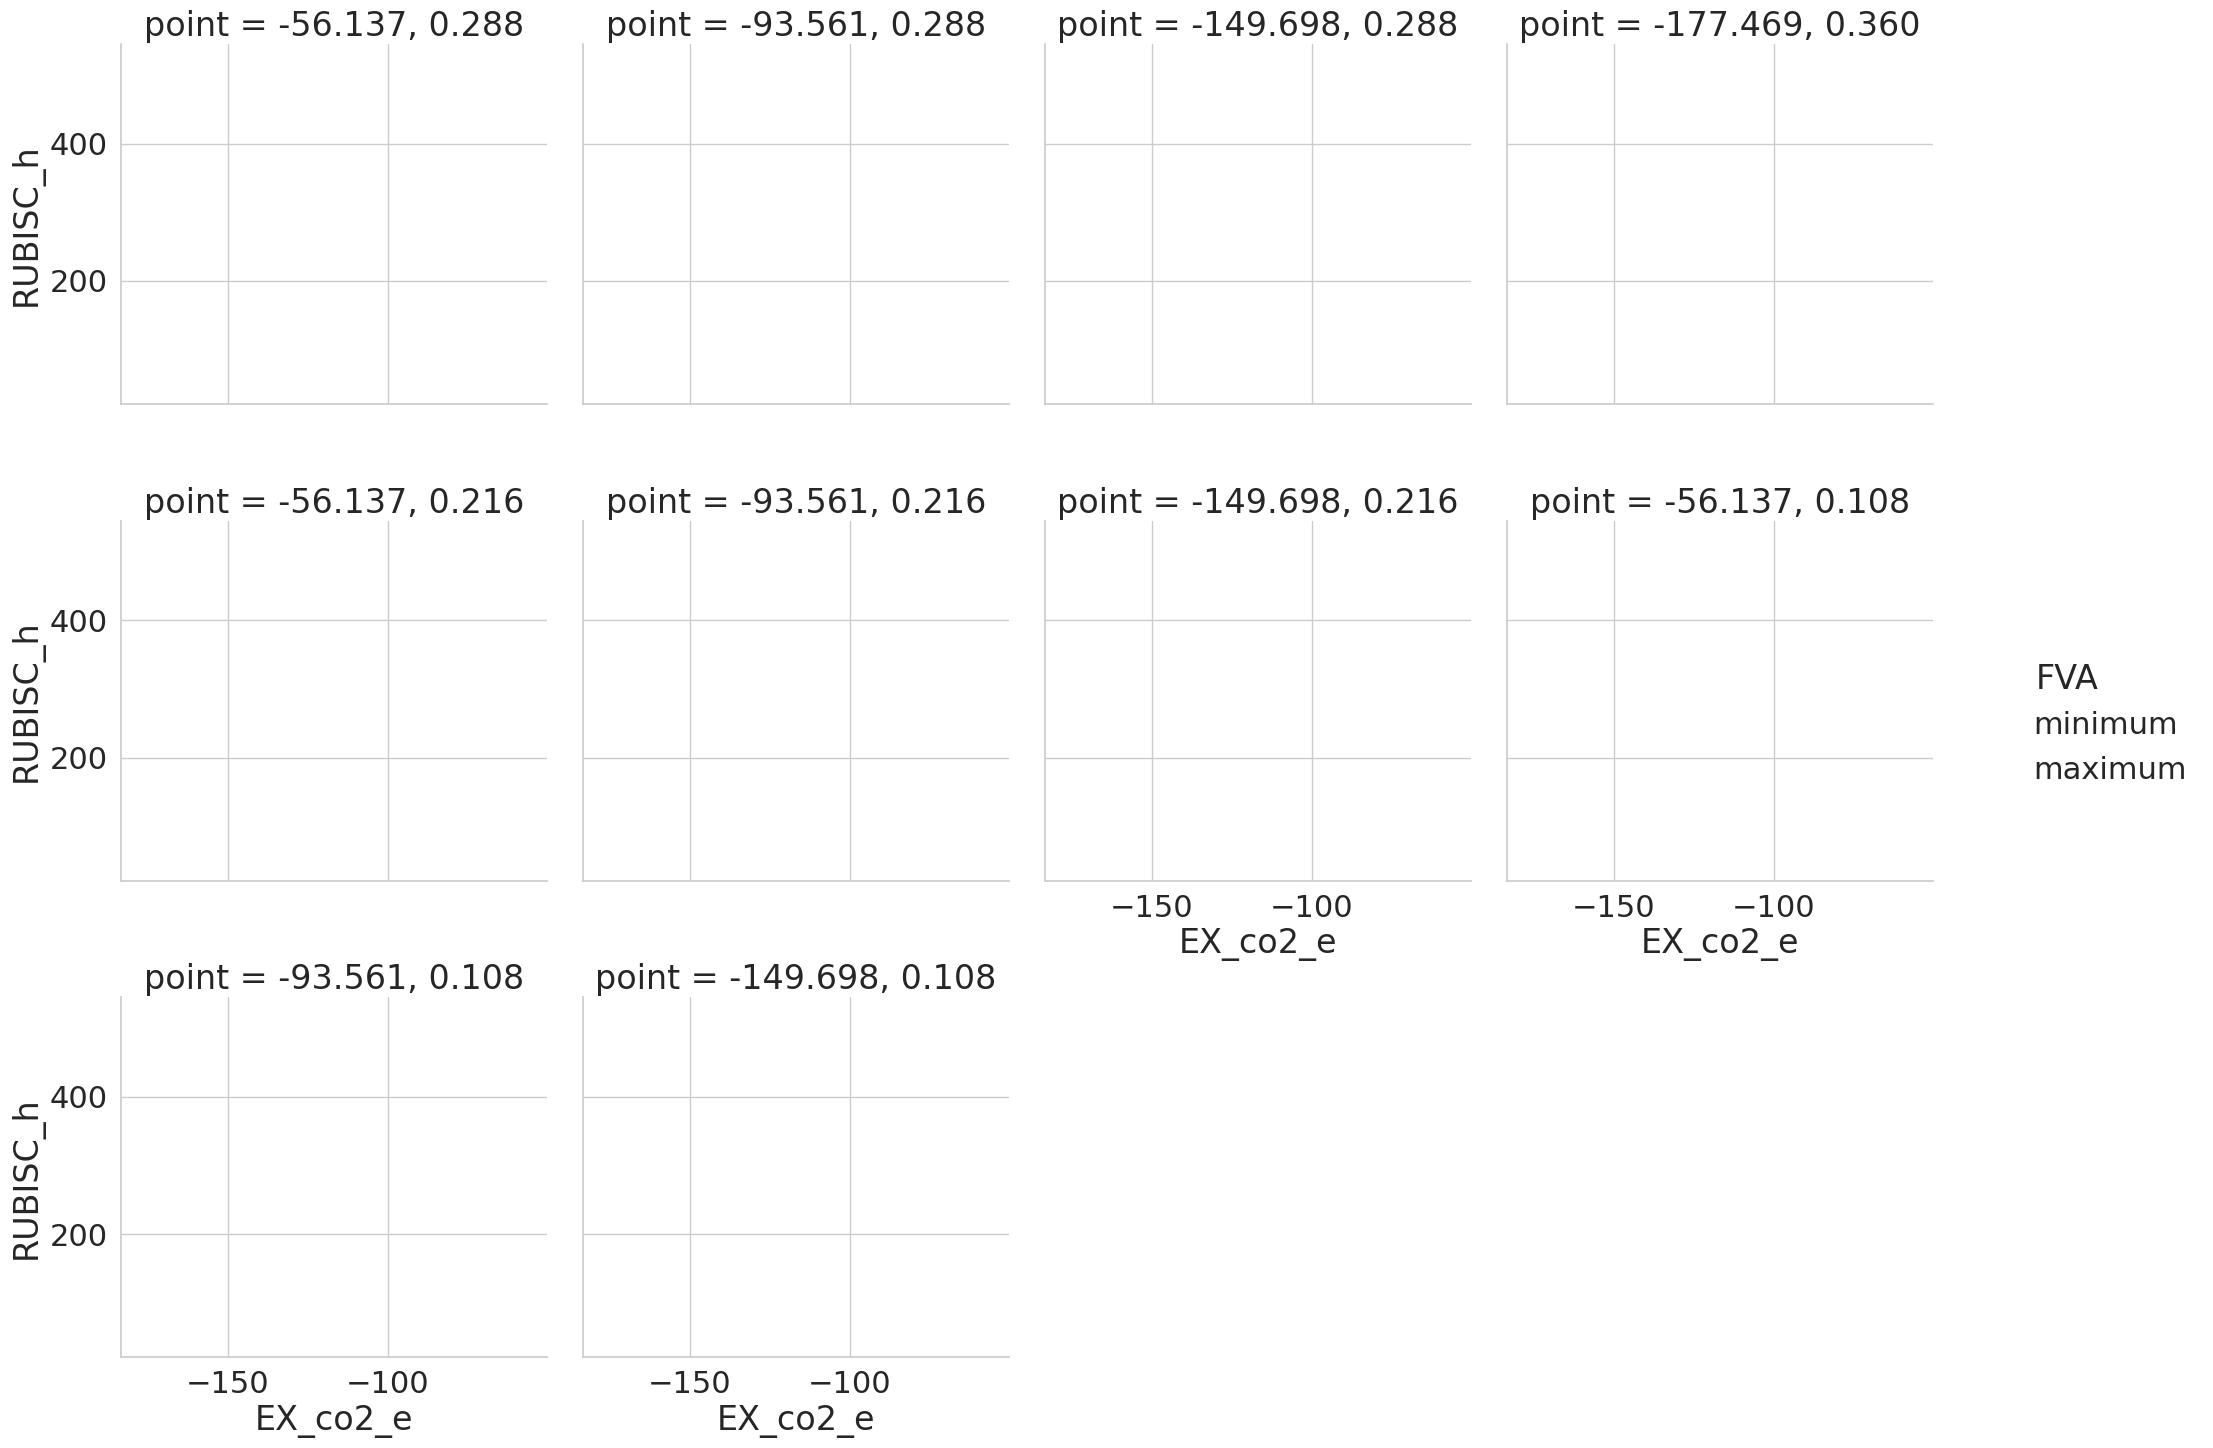

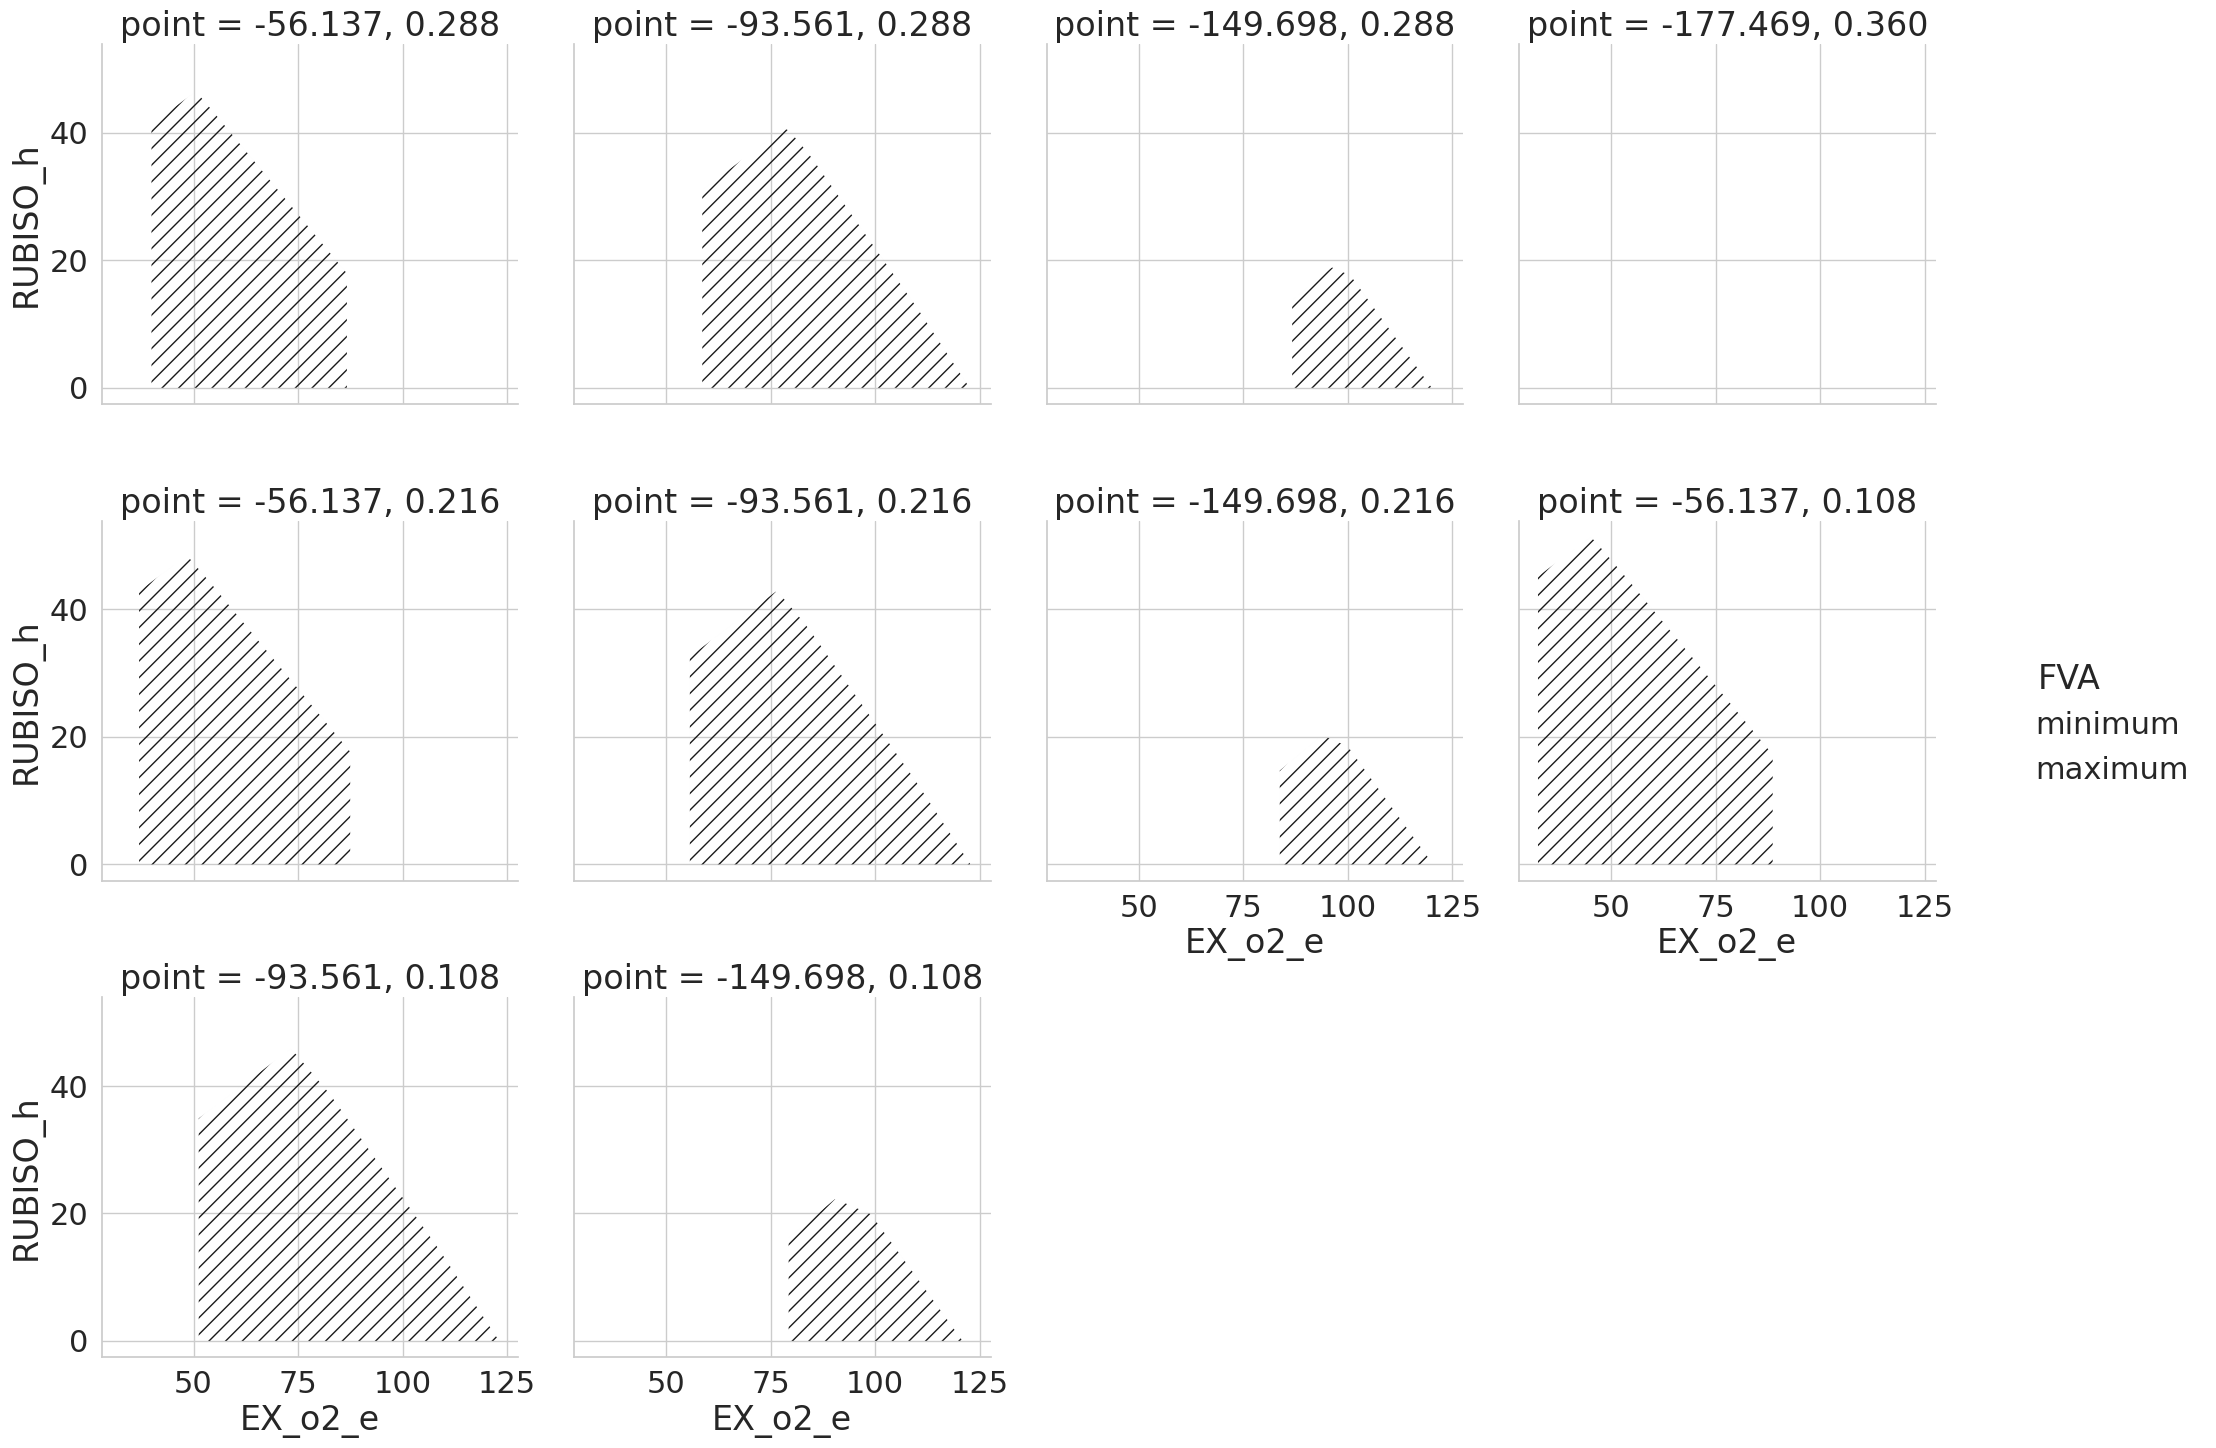

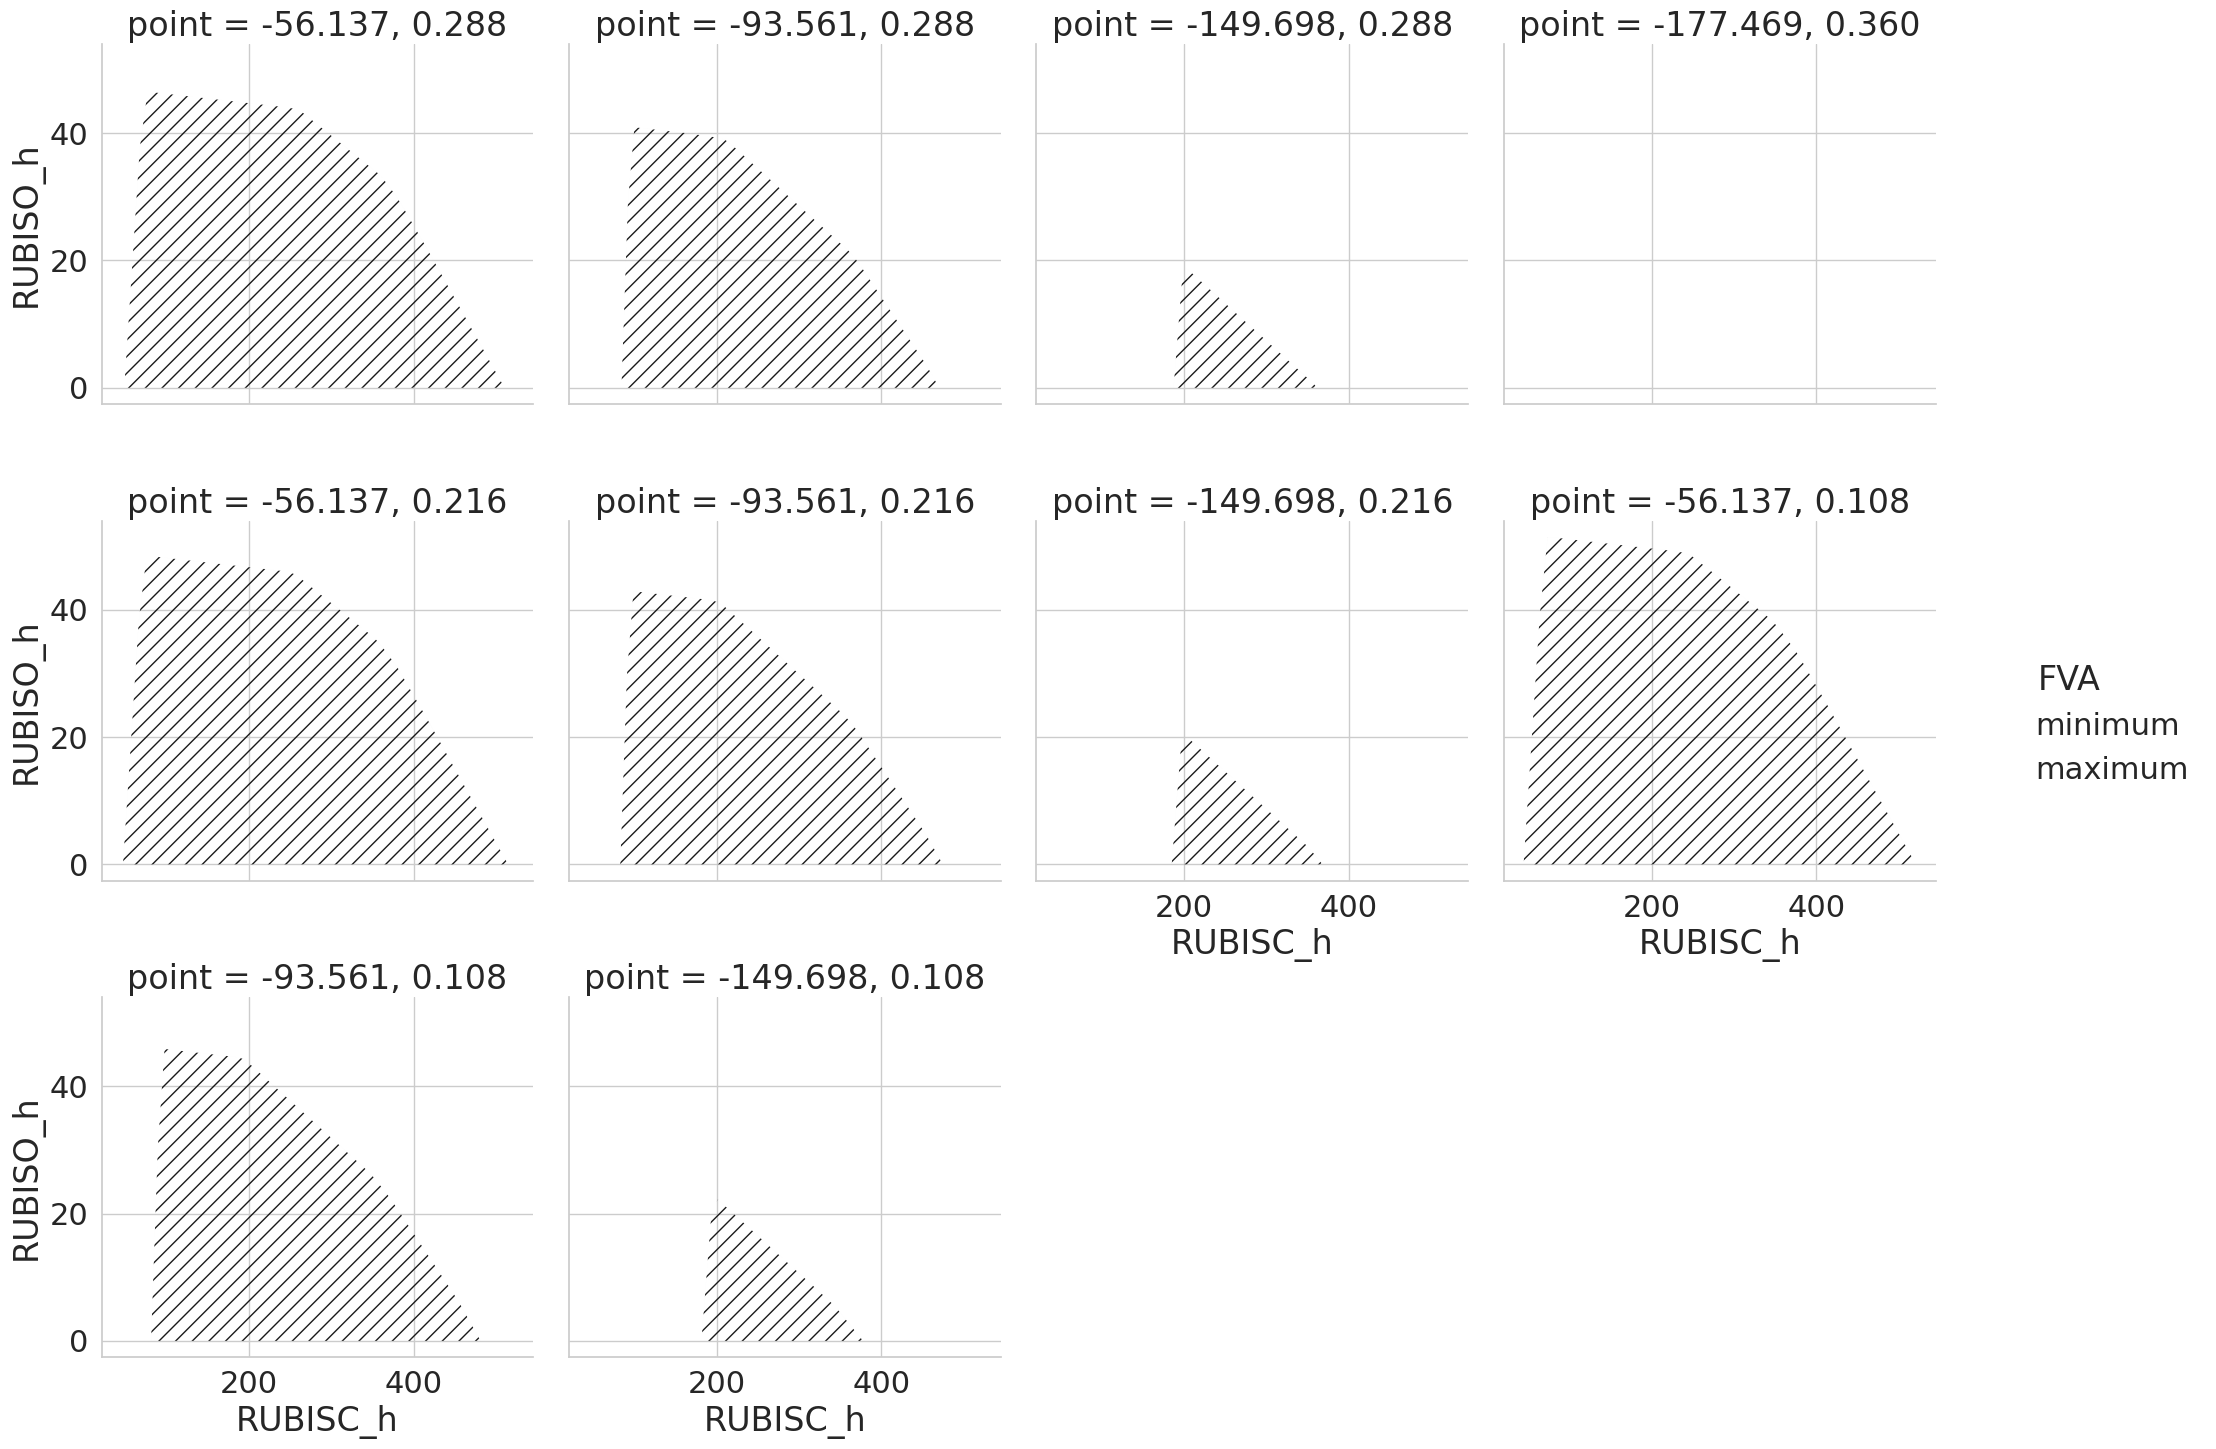

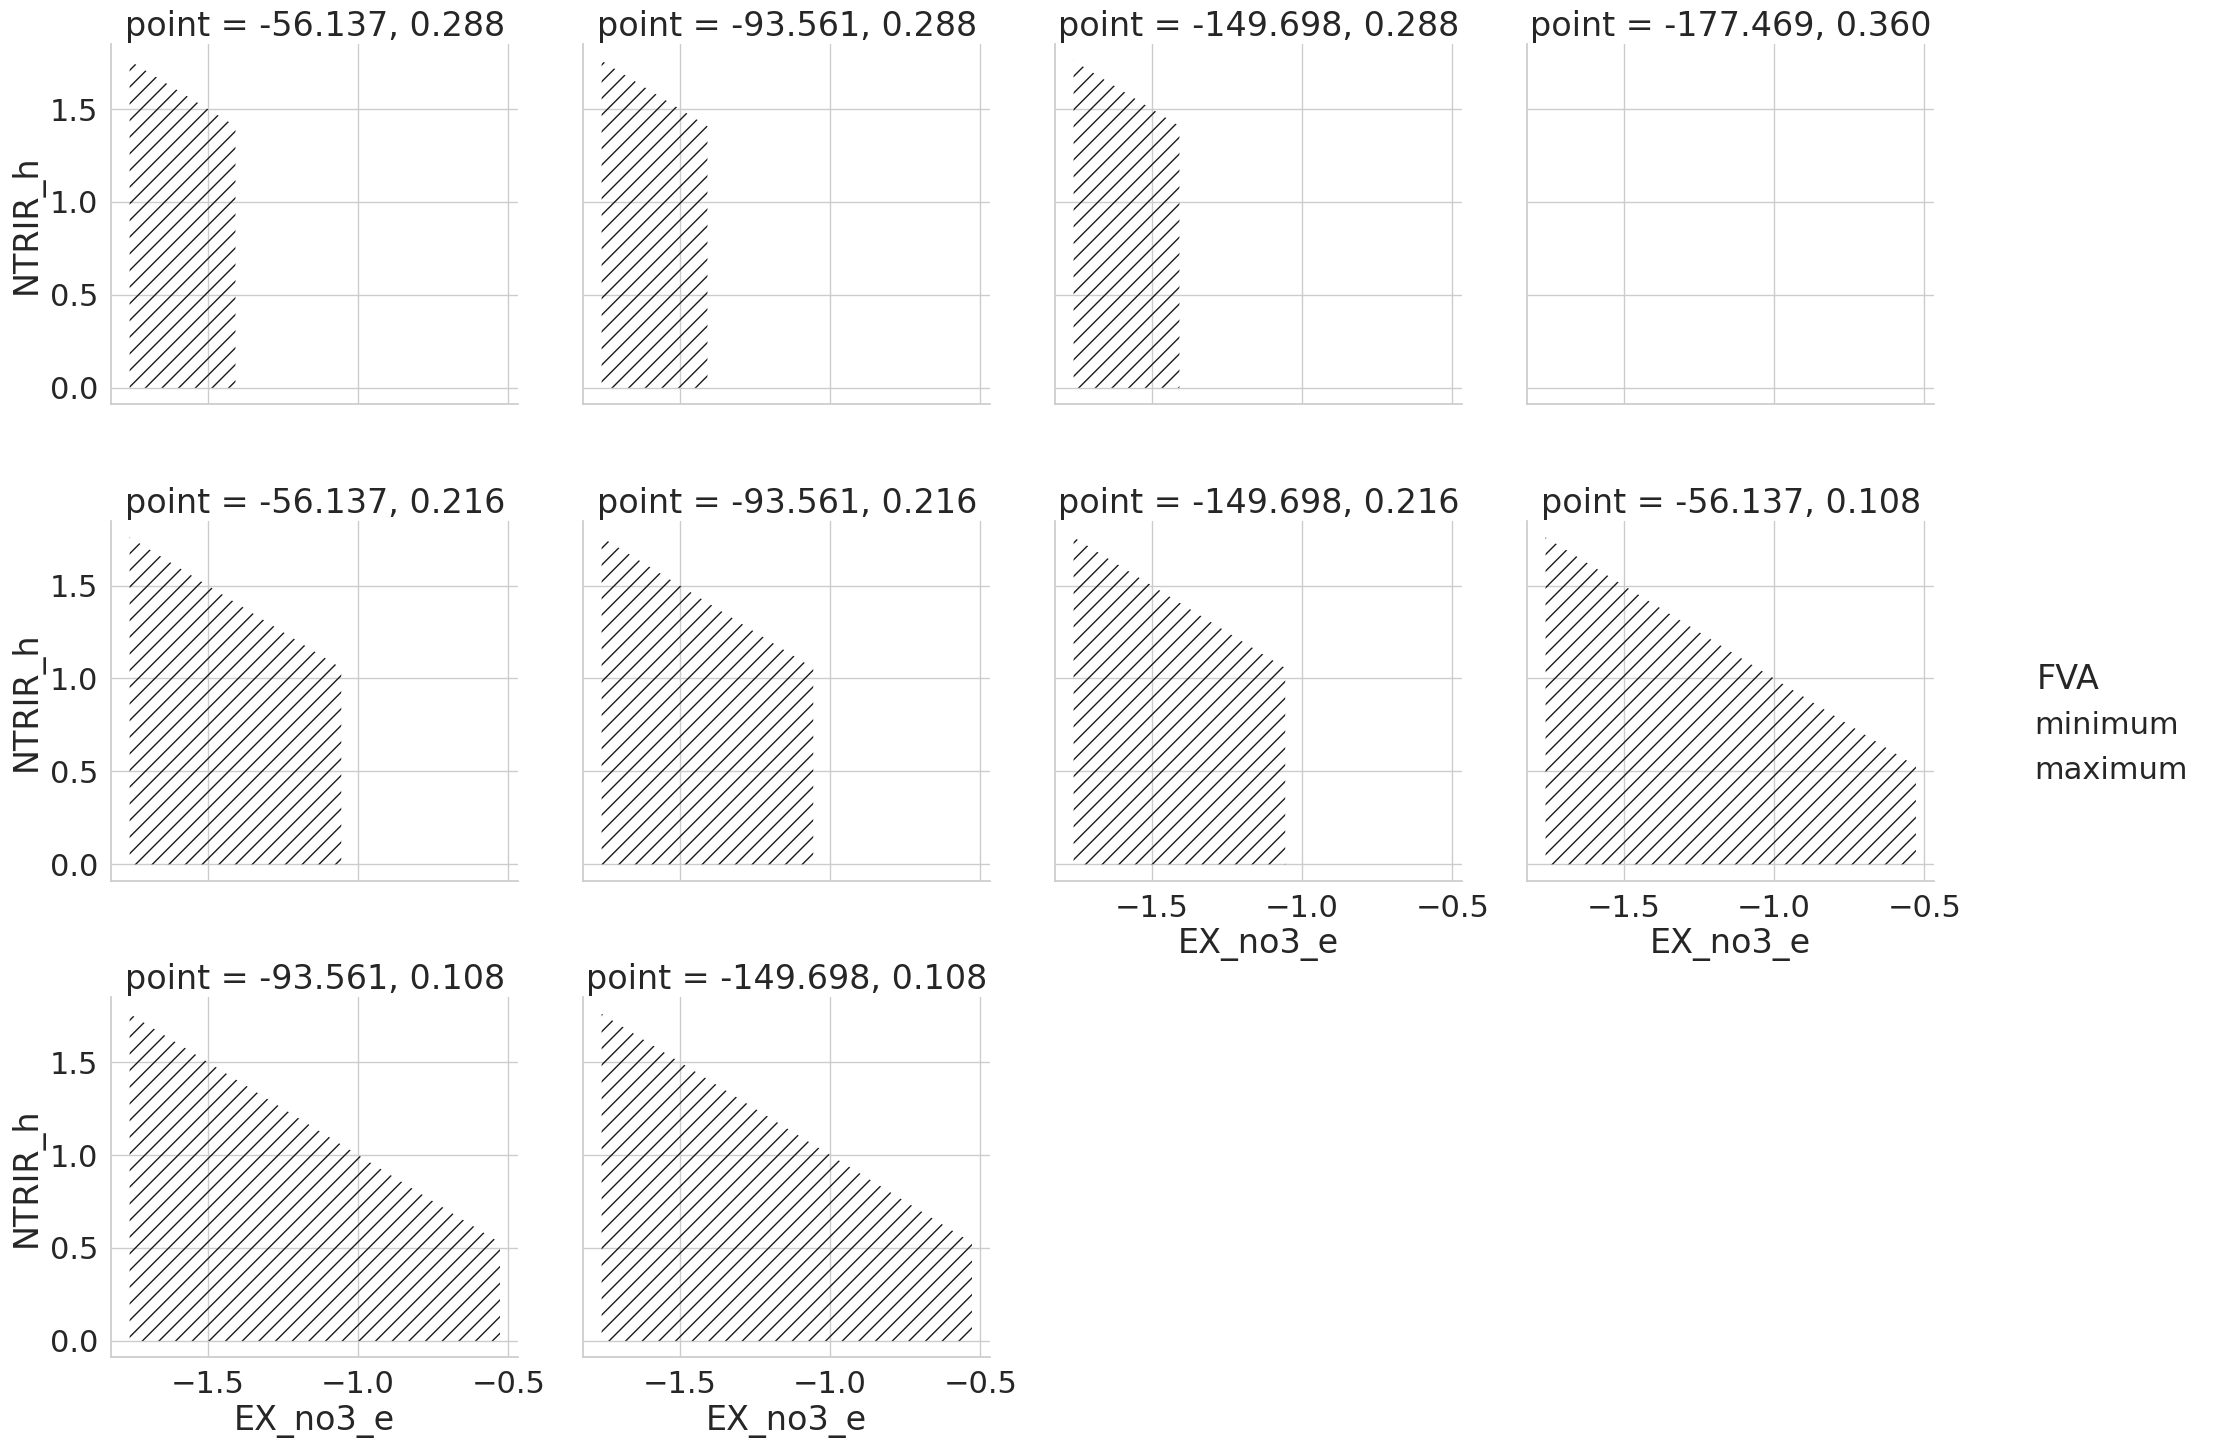

In [ ]:
grid_x = [-50, -100, -150, -175]
grid_y = [0.3, 0.2, 0.1]

reaction_couplings = [
    ('EX_co2_e', 'RUBISC_h'),
    ('EX_o2_e', 'RUBISO_h'),
    ("RUBISC_h", "RUBISO_h"),
    ("EX_no3_e", "NTRIR_h")
]

for coupling in reaction_couplings:
    diatom.analyze.quan_FCA(grid_x, grid_y, coupling)
    diatom.plot.plot_qFCA()